# Regressão Linear - Exemplo 001

Neste exemplo utilizaremos os mesmos dados da planilha eletrônica - https://github.com/marcelohebatista/Projetos-Data-Science/tree/main/Regress%C3%A3o_Linear_Planilha_Eletronica 

As referências bibliográficas utilizadas neste exemplo foram retiradas - https://github.com/cleuton/datascience

# Processo para o Desenvolvimento de Machine Learning

Vamos iniciar pelo que podemos chamar de clico de vida de ML, ou seja, utilizaremos essa "Big Picture" como guia.

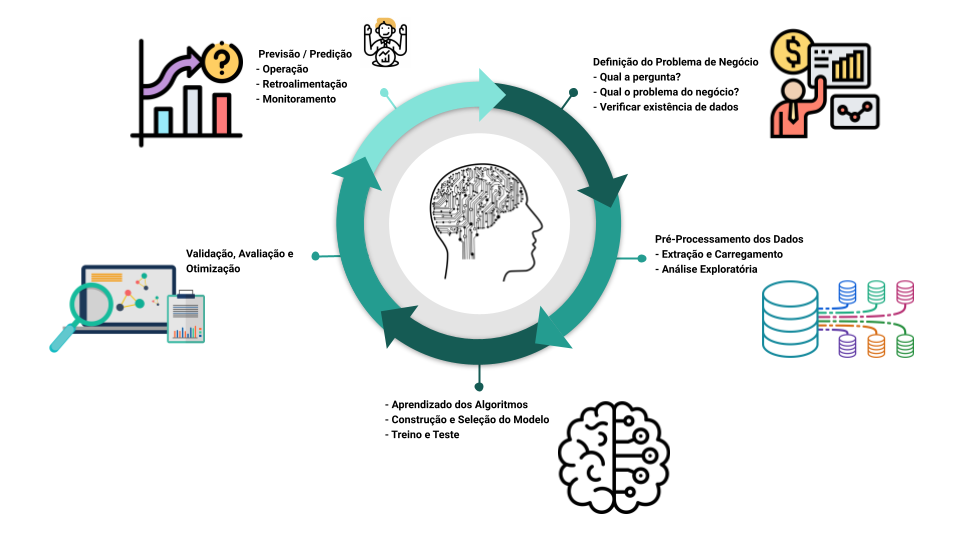

In [1]:
from IPython.display import Image
Image('Processo.png')

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import warnings
import sklearn as sl
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

## Definição do Problema de Negócio

## Pré-Processamento dos Dados

### Extração e Carregamento

In [4]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
dados = pd.read_csv('alunos.csv',decimal=',')

### Análise Exploratória

#### Estatística Descritiva

In [5]:
# Visualizando as primeiras 10 linhas
print(dados.head(10))

   Pesos Alturas
0     58    1.58
1     78    1.80
2     70    1.70
3     80    1.80
4     77    1.76
5     74    1.73
6     61    1.63
7     65    1.65
8     55    1.56
9     76    1.79


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior e depois aplique o modelo a novos dados.


In [6]:
# Visualizando as dimensões
dados.shape

(29, 2)

In [7]:
# Tipo de dados de cada atributo
dados.dtypes

Pesos       int64
Alturas    object
dtype: object

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pesos    29 non-null     int64 
 1   Alturas  29 non-null     object
dtypes: int64(1), object(1)
memory usage: 596.0+ bytes


In [9]:
# converter em Float
dados['Alturas'] = dados['Alturas'].astype(float)

In [10]:
# Tipo de dados de cada atributo
dados.dtypes

Pesos        int64
Alturas    float64
dtype: object

In [11]:
# Sumário estatístico
dados.describe()

,Pesos,Alturas
count,29.000000,29.000000
mean,64.862069,1.652414
std,9.284104,0.095829
min,50.000000,1.500000
25%,57.000000,1.570000
50%,65.000000,1.640000
75%,73.000000,1.730000
max,80.000000,1.830000


A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [12]:
# Correlação
dados.corr()

,Pesos,Alturas
Pesos,1.000000,0.988694
Alturas,0.988694,1.000000


#### Visualização

Iniciamos a análise exploratória, com o histograma, pois podemos rapidamente avaliar a distribuição de cada atributo. 

Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. 

Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. 

Isso também vai ajudar na identificação dos outliers.

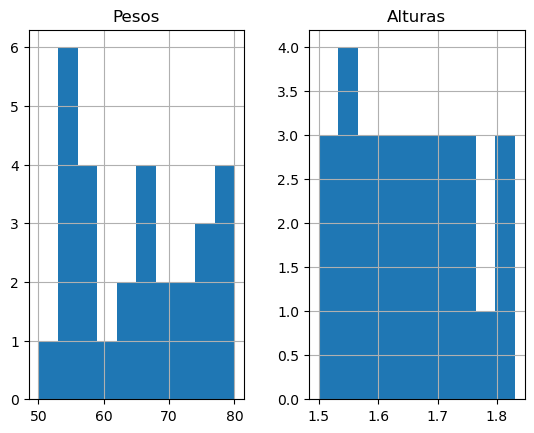

In [13]:
# Histograma Univariado
dados.hist()
plt.show()

<Figure size 640x480 with 0 Axes>

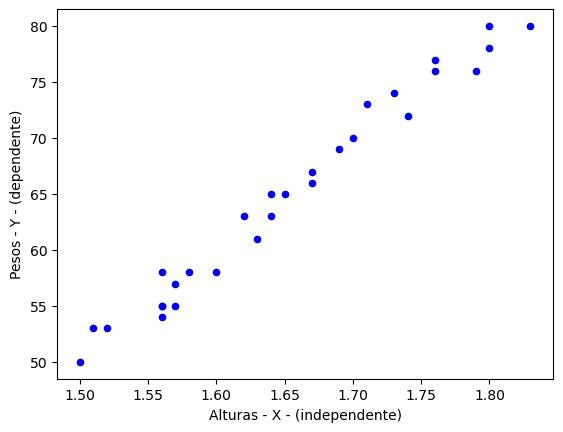

In [14]:
# Visualização 
dados1 = dados.sort_values('Alturas')

plt.figure()

dados1.plot.scatter(x='Alturas',
                       y='Pesos',
                       c='blue')

plt.xlabel('Alturas - X - (independente)')
plt.ylabel('Pesos - Y - (dependente)')
plt.show()

## Aprendizado dos Algoritmos

### Implementaçao do Método dos Mínimos Quadrados

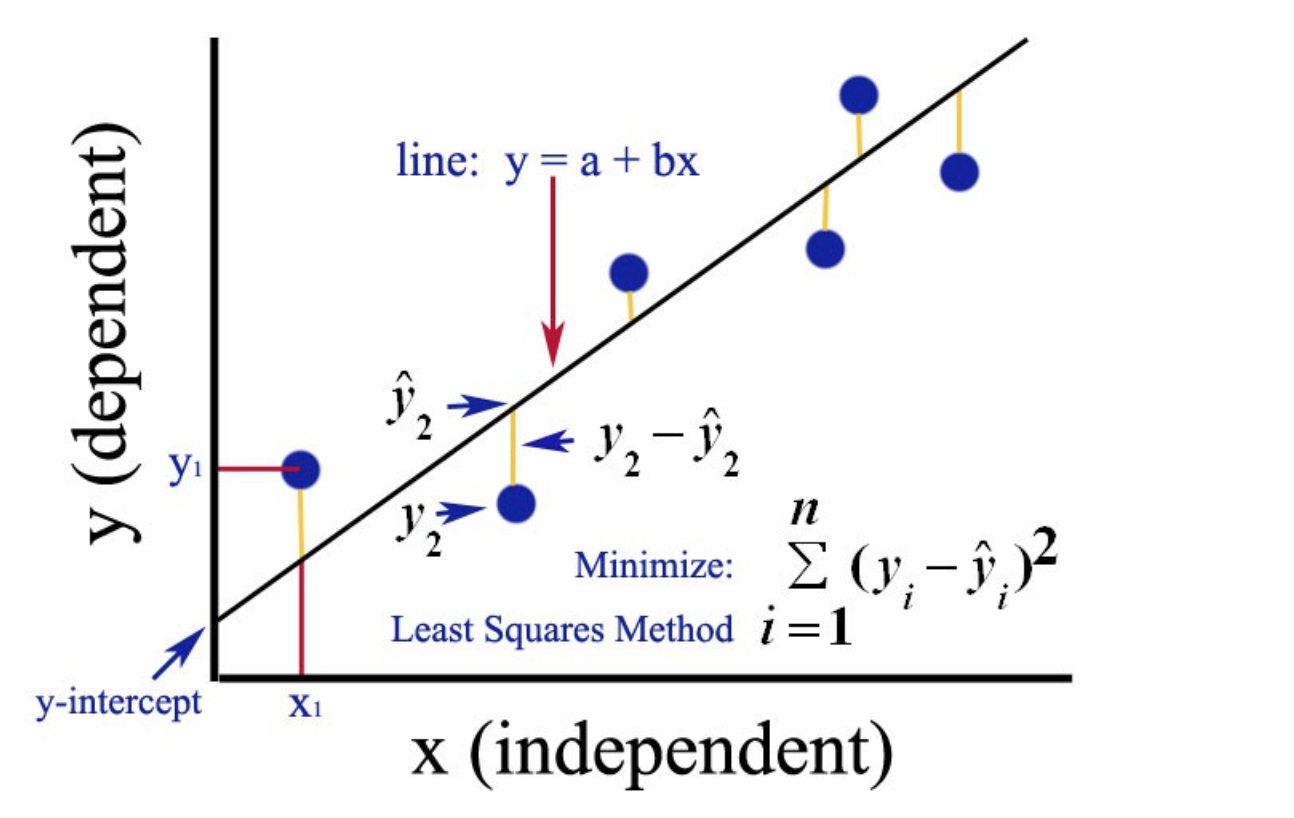

In [15]:
from IPython.display import Image
Image('minimos-quadrados1.png')

In [16]:
# Definindo variáveis x e y
X = dados['Alturas'].values
Y = dados['Pesos'].values

mean_x = np.mean(X)
mean_x

mean_y = np.mean(Y)
mean_y

n = len(X)

# Usando a fórmula para calcular a e b
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
#    print("X: ",X[i])
#    print("Y: ",Y[i])
#    print("x-mean", (X[i] - mean_x))
#    print("y-mean", (Y[i] - mean_y))
#    print("numer: ",numer)
#    print("denom: ",denom)

b = numer / denom
a = mean_y - (b * mean_x)

# Imprimindo os coeficientes
print(a, b)

-93.41669348782324 95.78639630940887


### Regressão Linear com Scikit-learn - Sem dados de teste

Nesta análise não iremos separar os dados entre treino e teste. Pois desejamos replicar os valores encontrados via planilha eletrônica.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Definindo variáveis X e Y


In [18]:
X = dados['Alturas'].values
Y = dados['Pesos'].values

#Converter para coluna
X_train = X[:, np.newaxis]
y_train = Y[:, np.newaxis]

#### Criando o modelo de regressão

In [19]:
modelo = linear_model.LinearRegression()

#### Treinando o modelo de regressão

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

## Validação, Avaliação e Otimização

In [21]:
print('Coefficient: \n', modelo.coef_)
print('Intercept: \n', modelo.intercept_)

Coefficient: 
 [[95.78639631]]
Intercept: 
 [-93.41669349]


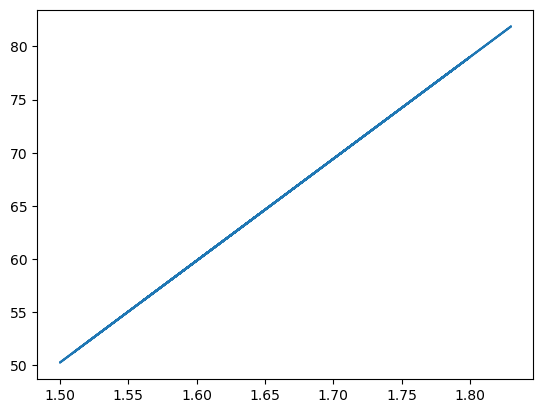

In [22]:
plt.plot(X, (b * X + a)) # curve
plt.show()

In [23]:
print(modelo.score(X_train,y_train))

0.9775166656373535


##  Previsão / Predição

Vamos agora predizer o peso de uma pessoa com 1 metro e 46 centimetros

In [24]:
print('predict: \n', modelo.predict([[1.46]]))

predict: 
 [[46.43144512]]


Vamos plotar os dados e a reta prospectada

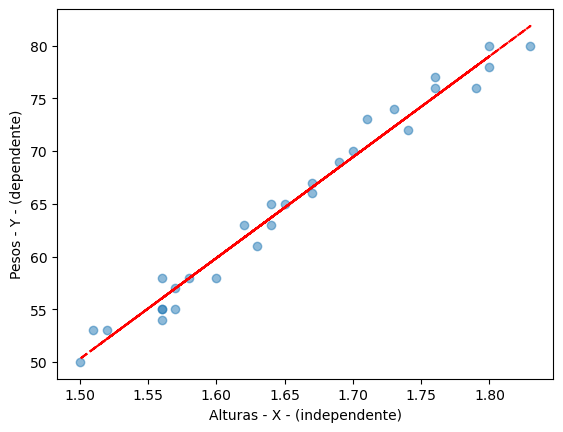

In [25]:
# Plot
plt.scatter(X_train, y_train, alpha=0.5)
#plt.title('Linha de tendência ')
plt.xlabel('Alturas - X - (independente)')
plt.ylabel('Pesos - Y - (dependente)')

#linha de tendencia
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")

plt.show()